# Import

In [1]:
import numpy as np
import pandas as pd

import requests
import bs4
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import datetime
import re

from sklearn.model_selection import train_test_split  

# Functions

In [2]:
# Меняет значение 0 и 1
def change_value(cell):
    if cell == 1:
        return 0
    else:
        return 1
    
# Поиск наличие национальной кухни в столбце
def cuisine_search(column):
    for cell in countries:
        if cell in column:
            return 1
        else:
            0

# При добавлении нового столбца (dummy перменной) 
# ставим 1 - при наличии, 0 - при отсутствии
def find_item(cell):
    if item in cell:
        return 1
    return 0

# Для определения количества объектов внутри ячейки
# (в нашем случае - количество кухонь)
def find_cuisine(cell):
    cell = cell.split(',')
    return len(cell)

# Поиск наличия даты в столбце отзыва
# 1 - есть, 0 - отутствует дата
def add_date(x):
    if x == []:
        return 0
    else:
        return 1

# Поиск количества отзывов через даты    
def find_review_date(cell):
    if len(cell) > 10:
        return 2
    elif len(cell) > 0:
        return 1
    else:
        return 0
    
# Качество отзыва через позитивное настроение в отзыве 
def mood(column):
    i = 0
    for cell in column:
        for mood in words:
            if mood == cell:
                i += 1
    return i

# Качество отзыва через позитивное настроение в отзыве 
def mood_bad(column):
    i = 0
    for cell in column:
        for mood in bad_words:
            if mood == cell:
                i += 1
    return i

# Проверка отсутствия значений в столбце
def precent_check(column):
    math = 100 - ((df[column].count() * 100) / 40000)
    print("В столбце",column,"отсутствует", '\033[4m' + str(round(math, 2)),"процентов" + '\033[0m',"информации.")
    
# Вывод основных статистических данных категориальных признаков
def categorical_check(column):
    display(pd.DataFrame(df[column].value_counts()))
    print(df[column].describe())

# Построение гистограммы и вывод основных статистических данных цифровых признаков
def numerical_check(column):
    display(df[column].hist(bins=100))
    print(df[column].describe())

# ---------------------------- Data ----------------------------

# Информация

* Restaurant_id: ID ресторана
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [3]:
df = pd.read_csv('main_task_new.csv') 

In [4]:
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


Как мы видим, существуют заметные пропуски в:
* Cuisine Style
* Price Range
* Number of Reviews

# Предобработка

In [6]:
# Для удобства просмотра убираем 
# ограничения просмотра ячейки
pd.set_option('display.max_colwidth', None)

In [7]:
# Переименуем индексы столбцов
df.columns = ['restaurant_id','city','cuisine_style','ranking','rating',
              'price_range','reviews_number','reviews','url_ta','id_ta']

In [8]:
# Проверим количество отсутствующих значений в столбцах  
precent_check('price_range')
precent_check('cuisine_style')
precent_check('reviews_number')

В столбце price_range отсутствует 34.72 процентов информации.
В столбце cuisine_style отсутствует 23.21 процентов информации.
В столбце reviews_number отсутствует 6.36 процентов информации.


In [9]:
df.ranking.fillna(value = 0, inplace = True)
df.rating.fillna(value = 0, inplace = True)
df['reviews_number'].fillna(value = 0, inplace = True)

# Обработка

### restaurant_id

In [10]:
# Проверим категориальный признак - restaurant_id
# Как мы видим, некоторые ресторана встречаются чаще,
# что говорит о сети ресторанов

categorical_check('restaurant_id')

,restaurant_id
id_633,18
id_227,18
id_871,18
id_436,18
id_430,17
...,...
id_14628,1
id_9288,1
id_9593,1
id_13622,1


count      40000
unique     11909
top       id_633
freq          18
Name: restaurant_id, dtype: object


### city

In [11]:
# Проверим категориальный признак - city
# Большое количество ресторанов сосредоточено
# в столице Великобритании - Лондон

categorical_check('city')

,city
London,5757
Paris,4897
Madrid,3108
Barcelona,2734
Berlin,2155
Milan,2133
Rome,2078
Prague,1443
Lisbon,1300
Vienna,1166


count      40000
unique        31
top       London
freq        5757
Name: city, dtype: object


<AxesSubplot:>

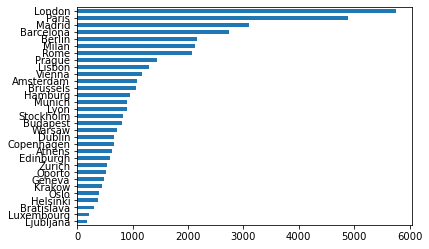

In [12]:
df.city.value_counts(ascending=True).plot(kind='barh')

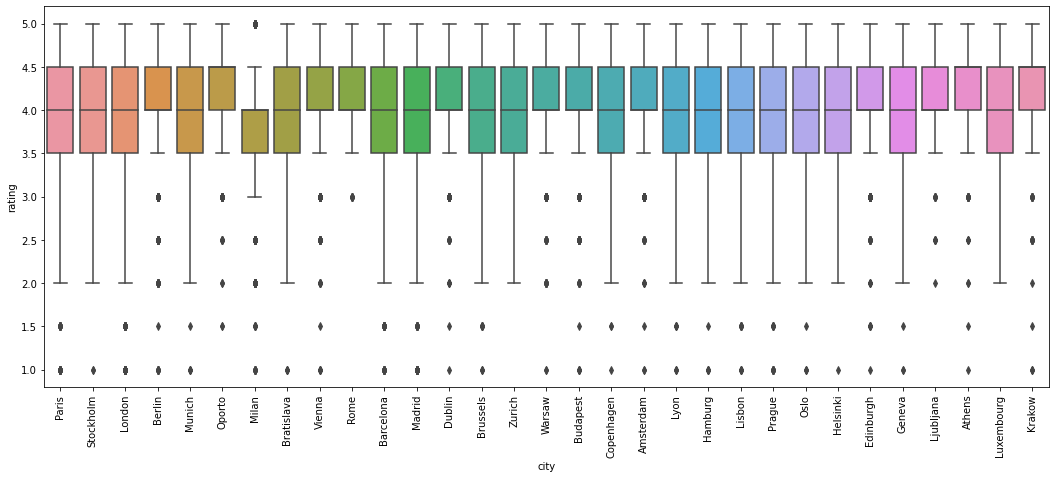

In [13]:
# Посмотрим на распределение рейтингов по городам

plt.figure(figsize=(18, 7))
sns.boxplot(x='city', y='rating', data=df)
plt.xticks(rotation=90);

Обработаем города по рейтингу и добавим новые признаки --> rank_city_min , rank_city_max , rank_normal

In [14]:
rank_city_min = df.groupby(['city'])['ranking'].min().to_dict()
rank_city_max = df.groupby(['city'])['ranking'].max().to_dict()

df['rank_city_min'] = df.city.map(rank_city_min)
df['rank_city_max'] = df.city.map(rank_city_max)
df['rank_normal'] = df.apply(lambda x: (x['ranking'] - x['rank_city_min'])/(x['rank_city_max'] - x['rank_city_min']), axis=1)

Распределим наличие ресторанов по городам 
и добавим новый признак --> rest_in_city

In [15]:
df['rest_in_city'] = df['city'].map(df.groupby(['city'])['restaurant_id'].count().to_dict())

### cuisine_style

In [16]:
# Проверим категориальный признак - cuisine_style
# Очень много грязных значений,  
# которые необходимо почистить

categorical_check('cuisine_style')

,cuisine_style
['Italian'],1032
['French'],805
['Spanish'],695
"['French', 'European']",405
['Cafe'],403
...,...
"['Bar', 'British', 'Pub', 'Grill', 'Vegetarian Friendly', 'Gluten Free Options']",1
"['Seafood', 'European', 'Portuguese', 'Mediterranean', 'Vegetarian Friendly', 'Gluten Free Options']",1
"['French', 'Halal']",1
"['Grill', 'Steakhouse', 'European']",1


count           30717
unique           9007
top       ['Italian']
freq             1032
Name: cuisine_style, dtype: object


In [17]:
# Добавим столбец, который покажет наличие кухни в каждом ресторана
df['no_cuisine_style'] = pd.isna(df['cuisine_style']).astype('float64')

In [18]:
# Очистим столбец cuisine_style от ненужных символов
# Применим функцию для подсчета количества кухонь в каждом ресторане

df.cuisine_style = df.cuisine_style.apply(lambda x: str(x).replace("\'",'').strip('[]'))
df.cuisine_style = df.cuisine_style.apply(lambda x: 'Unknown' if x == 'nan' else x)

df['cuisine_number'] = df.cuisine_style.apply(find_cuisine)

In [19]:
# Создадим столбец, определяющий наличие национальной кухни
# среди представленных кухонь в ресторане

cuisine_style = df.cuisine_style.apply(lambda x: str(x).split(','))

In [20]:
cuisine_style = cuisine_style.explode()

In [21]:
# Добавляем список всех стран, который поможет нам при поиске

countries = pd.read_csv('countries.csv')

In [22]:
countries = countries.Name

In [23]:
# Парсим список национальных кухонь из Википедия

url = 'https://en.wikipedia.org/wiki/List_of_cuisines'
r = requests.get(url)

# Достаем с сайта только нужные нам значения

soup = bs4.BeautifulSoup(r.text,'html.parser')
cuisine = soup.find_all('div',{'class':'div-col'})[0].find_all('a')

In [24]:
# Объединяем список стран и национальных кухонь

country = []

for item in cuisine:
    item = item.get_text()
    country.append(item)

country = pd.Series(country)
countries = countries.append(country)

In [25]:
# При парсинге некоторые значения имели по две кухни, 
# например: Indian Singaporean cuisine

cuisine_words = pd.Series(['Italian','Chinese','Indian',
                          'Jewish','Louisiana','Malaysian',
                         'Mediterranean','Pennsylvania','Singaporean'])
countries = countries.append(cuisine_words)

In [26]:
# Применяем функцию по поиску кухни внутри столбца,
# результат наличия национальной кухни - 1,
# отсутствия - 0

df['cuisine_national'] = df.cuisine_style.apply(cuisine_search)

In [27]:
df['cuisine_national'] = df['cuisine_national'].fillna(value = 0)

In [28]:
df.cuisine_national.value_counts()

1.0    24993
0.0    15007
Name: cuisine_national, dtype: int64

### price_range

In [29]:
# Как мы видим у price_range есть три значения и одно значение - nan

print(df.price_range.unique())
df.price_range.value_counts()

['$$ - $$$' nan '$$$$' '$']


$$ - $$$    18412
$            6279
$$$$         1423
Name: price_range, dtype: int64

In [30]:
# Заменим nan значения на самый часто встречаемый показатель
# Добавим новый столбец с показателем присутствия цены изначально
# Модифицируем столбец ценовой категории: 
# 3 - самая высокая цена, 2 - средняя цена, 1 - сама низкая цена

df['no_price'] = pd.isna(df['price_range']).astype('uint8')

In [31]:
df.no_price = df.no_price.apply(change_value)

In [32]:
replace_price = {'price_range': {"$": 1, "$$ - $$$": 2, "$$$$": 3, np.NaN: 2}}
df.replace(replace_price, inplace=True)

### reviews

In [33]:
# Много пропусков и много полезной, но не обработанной информации
categorical_check('reviews')

,reviews
"[[], []]",6471
"[['Whenever in Madrid, we never miss this gem...', 'Underrated sushi restaurant with very good...'], ['04/11/2017', '12/02/2016']]",2
"[['Thursday snack', 'Good value for money & good food!'], ['03/13/2017', '06/20/2016']]",2
"[['Simply Excellent!', 'Modern!'], ['10/22/2017', '08/29/2017']]",2
"[['Good Lebanese food', 'Decent place'], ['07/19/2017', '03/17/2017']]",2
...,...
"[['Authentic mexican food in the center of He...', 'Average'], ['09/23/2017', '09/06/2017']]",1
"[['Business Dinner', 'Slow cooked lamb and a decent curry'], ['11/22/2017', '11/12/2017']]",1
"[['Poorly cooked meat and butter knife for th...', 'What a little nice piece of Sicily !'], ['07/24/2017', '08/11/2012']]",1
"[['Good and unusual Vietnamese food', 'Nice food but noisy'], ['09/17/2017', '08/30/2017']]",1


count        40000
unique       33516
top       [[], []]
freq          6471
Name: reviews, dtype: object


In [34]:
# Переводим все буквы в строчные 
df.reviews = df.reviews.apply(lambda x: x.lower())

In [35]:
# Определяем слова для поиска в отзывах
words = ['good', 'great', 'nice', 'best', 'excellent', 
         'delicious', 'friendly', 'lovely' , 'unique', 
         'amazing', 'tasty', 'fantastic', 'perfect', 'wonderful',
        'super', 'awesome', 'love', 'beautiful', 'superb', 
         'interesting','yummy', 'fine', 'favourite', 
         'surprise', 'loved', 'brilliant','favorite']

df['words'] = df.reviews.str.findall(r"(\w+)")

In [36]:
bad_words = ['wasting', 'boring', 'lack', 'shameful',
             'not', 'avoid', 'ordinary', 'ordinary',
            'terrible','terrible', 'tired', 'dried',
             'poor','expensive','disappointed''dirty',
             'nothing','stuffy','dark','worst','inedible']

df['bad_words'] = df.reviews.str.findall(r"(\w+)")

Создадим новый признак --> review_mood

In [37]:
df['review_mood'] = df.words.dropna().apply(mood)
df.review_mood.fillna(0, inplace=True)

In [38]:
df['review_mood_bad'] = df.words.dropna().apply(mood_bad)
df.review_mood_bad.fillna(0, inplace=True)

Достаем даты из отзывов, создавая 1 категориальный признак и 2 цифровых признака

--> reviews_date (даты)

In [39]:
# Поиск по паттерну и добавление признака в новый столбец
pattern = re.compile('\d+\/\d+\/\d+')
df['reviews_date'] = df['reviews'].apply(lambda x: pattern.findall(x))

--> review_check (наличие отзыва)

In [40]:
# Приминяем функцию
df['review_check'] = df.reviews_date.apply(add_date)

In [41]:
# Убираем лишние символы
df.reviews_date = df.reviews_date.apply(lambda x: str(x).replace("\'",'').strip('[]'))

--> reviews_on_website (количество отзывов)

In [42]:
# Считаем количество отзывов через даты
df['reviews_on_website'] = df.reviews_date.apply(find_review_date)

### ranking

<AxesSubplot:>

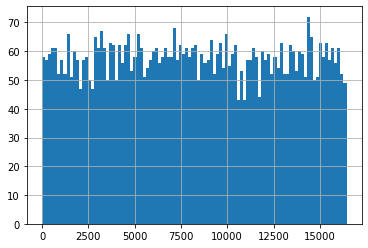

In [43]:
# Проверим рейтинг в самом популярном городе - Лондон
df.ranking[df['city'] =='London'].hist(bins=100)

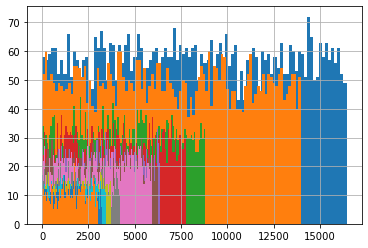

In [44]:
# Проверим рейтинг в 12 лучших городов
for x in (df['city'].value_counts())[0:12].index:
    df['ranking'][df['city'] == x].hist(bins=100)

plt.show()

Создадим новый признак --> ranking_normal

In [45]:
df['ranking_normal'] = df.ranking / df.rest_in_city

# Корреляция признаков

<AxesSubplot:>

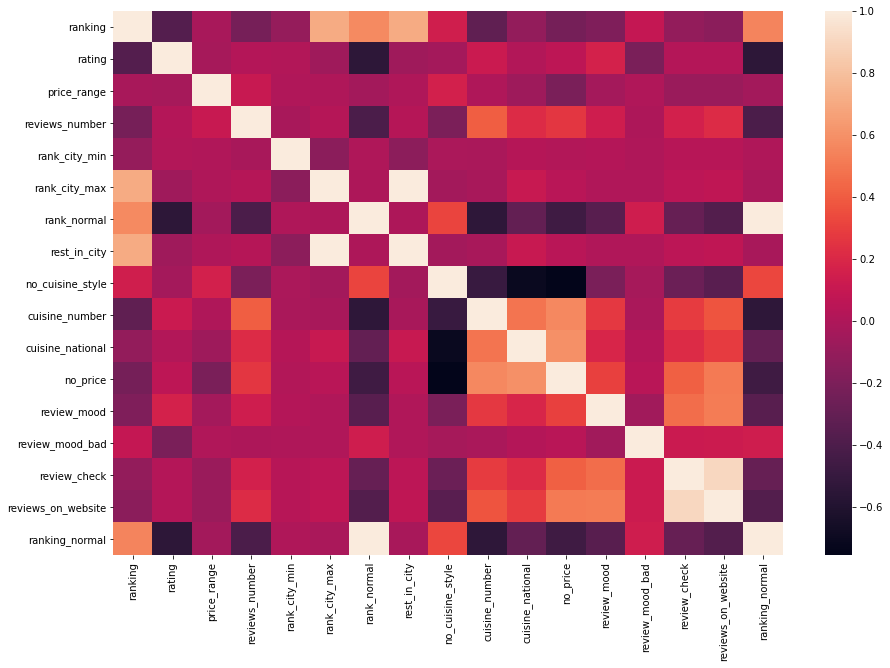

In [46]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(df.drop(['restaurant_id'], axis=1).corr(),)

# dummy variable

Для dummy variable были использованы города --> city

In [47]:
city = {}

for item in df.city:
    city[item] =0

def find_item(cell):
    if item in cell:
        return 1
    return 0

for item in city:
    df[item] = df['city'].apply(find_item)

## Проверяем все данные

In [48]:
df.columns

Index(['restaurant_id', 'city', 'cuisine_style', 'ranking', 'rating',
       'price_range', 'reviews_number', 'reviews', 'url_ta', 'id_ta',
       'rank_city_min', 'rank_city_max', 'rank_normal', 'rest_in_city',
       'no_cuisine_style', 'cuisine_number', 'cuisine_national', 'no_price',
       'words', 'bad_words', 'review_mood', 'review_mood_bad', 'reviews_date',
       'review_check', 'reviews_on_website', 'ranking_normal', 'Paris',
       'Stockholm', 'London', 'Berlin', 'Munich', 'Oporto', 'Milan',
       'Bratislava', 'Vienna', 'Rome', 'Barcelona', 'Madrid', 'Dublin',
       'Brussels', 'Zurich', 'Warsaw', 'Budapest', 'Copenhagen', 'Amsterdam',
       'Lyon', 'Hamburg', 'Lisbon', 'Prague', 'Oslo', 'Helsinki', 'Edinburgh',
       'Geneva', 'Ljubljana', 'Athens', 'Luxembourg', 'Krakow'],
      dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 57 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   restaurant_id       40000 non-null  object 
 1   city                40000 non-null  object 
 2   cuisine_style       40000 non-null  object 
 3   ranking             40000 non-null  float64
 4   rating              40000 non-null  float64
 5   price_range         40000 non-null  int64  
 6   reviews_number      40000 non-null  float64
 7   reviews             40000 non-null  object 
 8   url_ta              40000 non-null  object 
 9   id_ta               40000 non-null  object 
 10  rank_city_min       40000 non-null  float64
 11  rank_city_max       40000 non-null  float64
 12  rank_normal         40000 non-null  float64
 13  rest_in_city        40000 non-null  int64  
 14  no_cuisine_style    40000 non-null  float64
 15  cuisine_number      40000 non-null  int64  
 16  cuis

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [50]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['rating','restaurant_id','city','cuisine_style',
             'reviews','url_ta', 'id_ta', 'reviews_date', 
             'words','bad_words','cuisine_national'], axis = 1)
y = df['rating']

In [51]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [52]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [53]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [67]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [68]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20845699999999998


<AxesSubplot:>

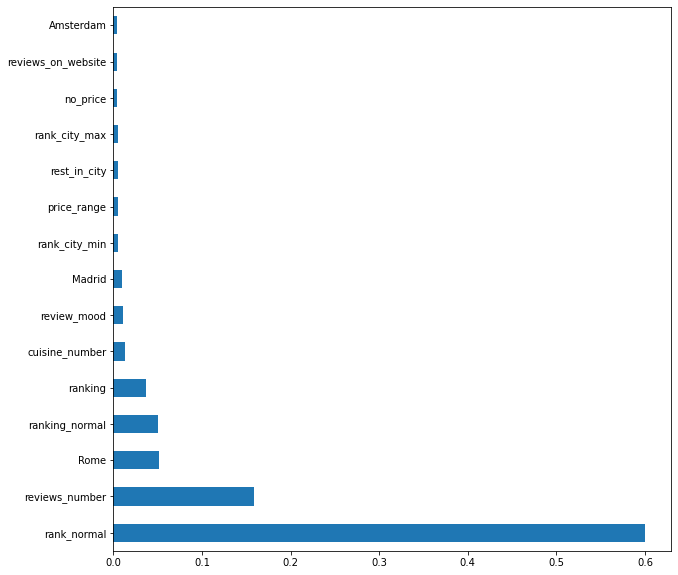

In [56]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')